# Analyse exploratoire des données

In [1]:
from collections import Counter
from dataset import load_dataset, preprocess
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
raw_dataset = load_dataset()
raw_dataset.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
preprocessed_dataset = preprocess(raw_dataset, limit=20)
preprocessed_dataset.head()

,Title,Genre,Plot
6,The Great Train Robbery,western,The film opens with two bandits breaking into ...
7,The Suburbanite,comedy,The film is about a family who move to the sub...
11,From Leadville to Aspen: A Hold-Up in the Rockies,crime,The film features a train traveling through th...
14,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...
15,Laughing Gas,comedy,The plot is that of a black woman going to the...


## Documents

### avant le pré-traitement

In [4]:
print(f"Document count: {len(raw_dataset):,}")

Document count: 34,886


### après le pré-traitement

In [5]:
document_loss = 1 - len(preprocessed_dataset) / len(raw_dataset)
print(f"Document count: {len(preprocessed_dataset):,} (⬇️ {document_loss * 100:.0f}%)")

Document count: 26,164 (⬇️ 25%)


## Classes

In [6]:
def plot_genre_counts(dataset, limit=None):
    genre_counts = dataset["Genre"].value_counts()
    if limit is not None:
        genre_counts = genre_counts[:limit]
    plt.bar(genre_counts.index, genre_counts)
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.title("Class distribution")
    plt.show()

### Avant le pré-traitement

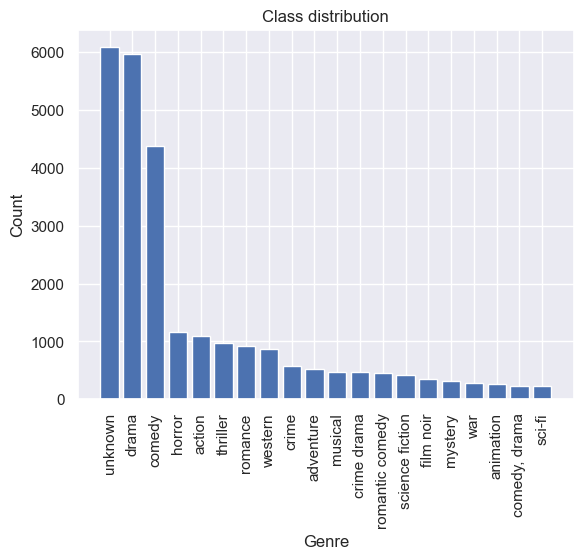

In [7]:
plot_genre_counts(raw_dataset, limit=20)

In [8]:
unknown_document_count = len(raw_dataset[raw_dataset["Genre"] == "unknown"])
print(f"Unknown document count: {unknown_document_count:,} ({unknown_document_count / len(raw_dataset) * 100:.0f}%)")

Unknown document count: 6,083 (17%)


### Après le pré-traitement

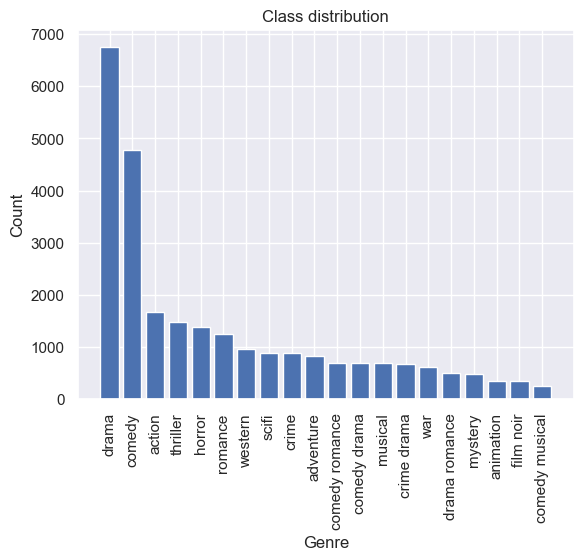

In [9]:
plot_genre_counts(preprocessed_dataset)

## Phrases

In [10]:
sentences = preprocessed_dataset['Plot'].map(sent_tokenize)
sentence_counts = sentences.map(len)
sentence_count = sentence_counts.sum()
print(f"Sentence count: {sentence_count:,}")

Sentence count: 501,008


## Tokens

In [11]:
plots_lowercase = preprocessed_dataset['Plot'].str.lower()
word_counts = Counter()
for plot in plots_lowercase:
    plot_words = word_tokenize(plot)
    word_counts.update(plot_words)

In [12]:
word_count = word_counts.total()
vocabulary_size = len(word_counts)
print(f"Word count: {word_count:,}")
print(f"Vocabulary size: {vocabulary_size:,}")

Word count: 11,499,934
Vocabulary size: 138,321


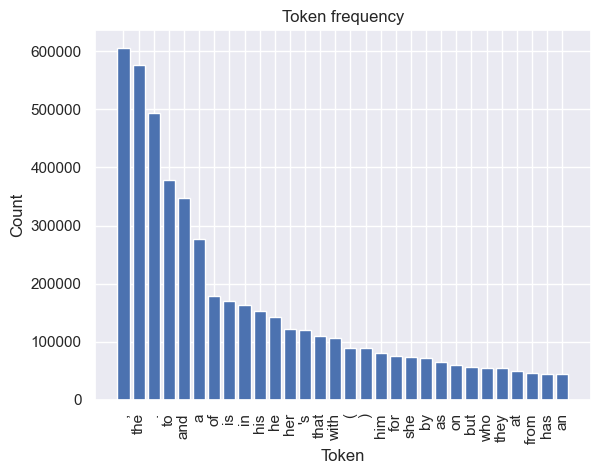

In [13]:
word_to_count = {word: count for word, count in word_counts.most_common(30)}
plt.bar(word_to_count.keys(), word_to_count.values())
plt.title("Token frequency")
plt.xticks(rotation=90)
plt.xlabel("Token")
plt.ylabel("Count")
plt.show()